# CSCE 556 - Data Analysis in Python: Application to Neuroscience

## Laboratory 9 - Pattern recognition and artificial intelligence

The objective of this laboratory is to gain some familiarity with techniques from pattern recognition, machine learning, and artificial intelligence.

### Preamble
For this laboratory, we will use data collected from neurons.

In [1]:
!pip install -q allensdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 53.

We start by using the API from the [Allen Institute for Brain Science](https://alleninstitute.org/what-we-do/brain-science/research/allen-institute-brain-science/) to download cellular data. These data were obtained during patch clamp experiments. A set of notebooks showing examples of how to use this API can be found [here](https://allensdk.readthedocs.io/en/latest/examples.html).

In [2]:
import pandas as pd
from allensdk.core.cell_types_cache import CellTypesCache, CellTypesApi

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto your hard drive.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Listing all available cells an making a data frame containing
# this information.
cells_df = pd.DataFrame(ctc.get_cells()).set_index("id")
# cells_df
species_df = pd.DataFrame(cells_df['species']).reset_index().rename(columns={'id': 'specimen_id'})
species_df

,specimen_id,species
0,525011903,Homo Sapiens
1,565871768,Mus musculus
2,469801138,Mus musculus
3,528642047,Homo Sapiens
4,605889373,Mus musculus
...,...,...
2328,601958555,Homo Sapiens
2329,488473535,Mus musculus
2330,467003163,Mus musculus
2331,572609946,Mus musculus


Note that cells have been collected for two species:

In [3]:
species = cells_df.species.unique()
species

array(['Homo Sapiens', 'Mus musculus'], dtype=object)

In plain English, these are humans (Homo Sapiens) and mice (Mus musculus).

We now load the values computed for the electrophysiological features (see [Allen Institute's white paper on electrophysiological characterization](http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf
) for more information on these features). Note that the IDs specified in the `specimen_id` column (and set as an index) in the table `ef_df` below correspond to the IDs specified in the `id` column (and set as the index) in the table `cell_df`.

In [4]:
ef_df = pd.DataFrame(ctc.get_ephys_features()).set_index("specimen_id")
ef_df

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569955172,0.001963,9.182407,-1.750000,1.013889e+00,1.030300,12.216160,1.024077,-58.781250,-56.218753,-62.375003,...,12.216207,1.255667,-58.937500,-56.322920,-78.666672,1.477299,1.234940,1.447535,-88.937508,-78.321983
573410831,0.064670,102.640000,25.802499,1.585265e-01,1.273960,2.804420,1.025750,-49.187504,-49.062500,-50.593752,...,2.847900,1.979330,-61.281254,-59.187500,-74.328125,3.919119,4.053287,4.134621,-96.250008,-74.360977
576285618,0.239796,27.853333,-2.267500,7.307692e-02,1.095120,2.426287,1.025020,-51.531250,-50.437501,-52.481252,...,2.426347,1.633196,-51.593750,-50.510418,-70.618750,2.646425,2.688956,2.838209,-95.000008,-70.443848


We can visualize the data for a set of features present in `ef_df` (`adaptation`, `f_i_curve_slope`, `inpute_resistance_mohm`, and `tau` in this example), using `species` for the `hue`.

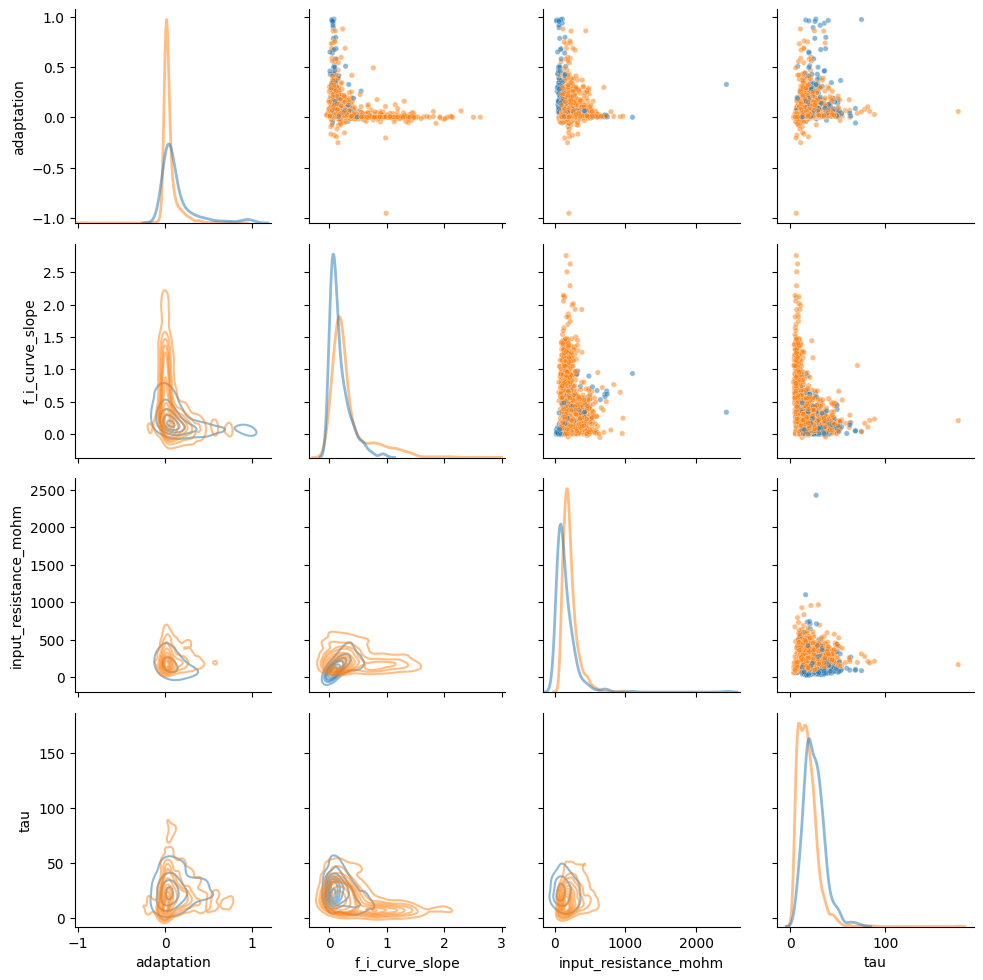

In [5]:
import seaborn as sns
features = ["adaptation", "f_i_curve_slope",
            "input_resistance_mohm", "tau"]

dat = cells_df[["species"]].merge(ef_df[features],
                                  left_index=True, right_index=True)

g = sns.PairGrid(dat,
                 diag_sharey=False,
                 hue="species")
g.map_upper(sns.scatterplot, s=15, alpha=0.5)
g.map_lower(sns.kdeplot, alpha=0.5)
g.map_diag(sns.kdeplot, lw=2, alpha=0.5, common_norm=False)

This plot provides a qualitative appreciation of whether recorded cells have a different electrophysiological behavior between mice and humans, but they do not allow us to conclude with certainty if differences are statistically significant. We can use a Student t-test to evaluate whether there is a significant difference in these features between species. Note that both the t and p values are reported by the Scipy implementation of the t-test. Also note that for such a test to be valid, only one value per subject must be used (i.e., no repetitions within subjects; the `donor_id` column in cells_df specifies the identity of the subject). To present these results in a way that is "publication-ready", we can use a Pandas DataFrame to show numbers in a format like `X.XXe+XX ± X.XXe+XX (N=XXXX)`, encoding this information as strings.

In [6]:
from scipy.stats import ttest_ind
import numpy as np

dat = cells_df[["species", "donor_id"]].merge(ef_df[features],
                                  left_index=True, right_index=True)

dat = dat.groupby(["donor_id", "species"]).mean().reset_index()

means_x = []
means_y = []
ts = []
ps = []
for feature in features:
  x = dat.loc[dat.species == species[0], feature].dropna()
  y = dat.loc[dat.species == species[1], feature].dropna()
  t, p = ttest_ind(x, y)
  ts.append(f"{t:.2e}")
  ps.append(f"{p:.2e}")
  means_x.append(f"{np.mean(x):.2e} ± {np.std(x):.2e} (N={len(x)})")
  means_y.append(f"{np.mean(y):.2e} ± {np.std(y):.2e} (N={len(y)})")

stats_df = pd.DataFrame({f"{species[0]} mean ± STD (N)": means_x,
                         f"{species[1]} mean ± STD (N)": means_y,
                          "t statistics": ts, "p-values": ps})

stats_df.index = features

stats_df

,Homo Sapiens mean ± STD (N),Mus musculus mean ± STD (N),t statistics,p-values
adaptation,1.24e-01 ± 9.42e-02 (N=41),5.22e-02 ± 8.04e-02 (N=869),5.56e+00,3.62e-08
f_i_curve_slope,1.87e-01 ± 1.16e-01 (N=42),3.34e-01 ± 3.18e-01 (N=920),-2.98e+00,2.98e-03
input_resistance_mohm,1.76e+02 ± 1.19e+02 (N=42),2.18e+02 ± 9.07e+01 (N=920),-2.94e+00,3.33e-03
tau,2.42e+01 ± 6.28e+00 (N=42),1.79e+01 ± 9.20e+00 (N=920),4.38e+00,1.31e-05


### Assignment

For that laboratory, we will use the `ef_df` DataFrame we just loaded and use it to develop a classifier that can predict if a cell comes from a human or a mouse. As previously shown, the `ef_df` DataFrame contains electrophysiological features in a wide format. However, some of these columns are not relevant features (i.e., IDs). Therefore, we drop these columns to keep only the columns corresponding to relevant features. We also drop `seal_gohm`. This column contains the resistance of the seal between the pipette and the cell during the patch clamp recording. This characterizes the instrumentation, not the cell itself.

In [7]:
features = ef_df.drop(columns=['rheobase_sweep_id', 'rheobase_sweep_number',
                               'thumbnail_sweep_id', 'id',
                               #'specimen_id',      # specimen_id is set and an index of ef_df
                               'seal_gohm'])

In [8]:
features # 2333 rows x 50 columns


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569955172,0.001963,9.182407,-1.750000,1.013889e+00,1.030300,12.216160,1.024077,-58.781250,-56.218753,-62.375003,...,12.216207,1.255667,-58.937500,-56.322920,-78.666672,1.477299,1.234940,1.447535,-88.937508,-78.321983
573410831,0.064670,102.640000,25.802499,1.585265e-01,1.273960,2.804420,1.025750,-49.187504,-49.062500,-50.593752,...,2.847900,1.979330,-61.281254,-59.187500,-74.328125,3.919119,4.053287,4.134621,-96.250008,-74.360977
576285618,0.239796,27.853333,-2.267500,7.307692e-02,1.095120,2.426287,1.025020,-51.531250,-50.437501,-52.481252,...,2.426347,1.633196,-51.593750,-50.510418,-70.618750,2.646425,2.688956,2.838209,-95.000008,-70.443848


In [9]:
features.columns

Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square', 'ri', 'sag',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'tau',
       'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'threshold_v_short_square', 'trough_t_long_square', 'trough_t_ramp',
       'trough_t_short_squar

In [10]:
print(len(cells_df['donor_id']))
print(len(cells_df['donor_id'].unique()))

2333
962


In [11]:
print(cells_df['donor_id'].shape)

(2333,)


In [12]:
new_df = pd.merge(features, species_df, on='specimen_id', how='inner')

In [13]:
new_df

,specimen_id,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,species
0,529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,...,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391,Homo Sapiens
1,548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,...,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595,Homo Sapiens
2,579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,...,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321,Mus musculus
3,439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,...,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559,Mus musculus
4,515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,...,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991,Mus musculus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,569955172,0.001963,9.182407,-1.750000,1.013889e+00,1.030300,12.216160,1.024077,-58.781250,-56.218753,...,1.255667,-58.937500,-56.322920,-78.666672,1.477299,1.234940,1.447535,-88.937508,-78.321983,Mus musculus
2329,573410831,0.064670,102.640000,25.802499,1.585265e-01,1.273960,2.804420,1.025750,-49.187504,-49.062500,...,1.979330,-61.281254,-59.187500,-74.328125,3.919119,4.053287,4.134621,-96.250008,-74.360977,Mus musculus
2330,576285618,0.239796,27.853333,-2.267500,7.307692e-02,1.095120,2.426287,1.025020,-51.531250,-50.437501,...,1.633196,-51.593750,-50.510418,-70.618750,2.646425,2.688956,2.838209,-95.000008,-70.443848,Mus musculus
2331,520462275,0.066685,119.322857,-15.087501,1.131737e-01,1.318820,3.928953,1.024840,-52.406250,-54.854169,...,1.888704,-52.406250,-54.937503,-75.993753,3.560123,3.500551,3.714190,-98.593758,-79.264778,Homo Sapiens


In [14]:
y = new_df['species']
print(y.shape)
y

(2333,)


0       Homo Sapiens
1       Homo Sapiens
2       Mus musculus
3       Mus musculus
4       Mus musculus
            ...     
2328    Mus musculus
2329    Mus musculus
2330    Mus musculus
2331    Homo Sapiens
2332    Mus musculus
Name: species, Length: 2333, dtype: object

Write a classifier that uses electrophysiological features to automatically classify the species from which cells have been collected. You will need the following functions and classes (see their documentation to know how to use them):

In [15]:
new_df = new_df.drop(columns=['specimen_id','species'])
new_df

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
0,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
1,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
2,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
3,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
4,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,0.001963,9.182407,-1.750000,1.013889e+00,1.030300,12.216160,1.024077,-58.781250,-56.218753,-62.375003,...,12.216207,1.255667,-58.937500,-56.322920,-78.666672,1.477299,1.234940,1.447535,-88.937508,-78.321983
2329,0.064670,102.640000,25.802499,1.585265e-01,1.273960,2.804420,1.025750,-49.187504,-49.062500,-50.593752,...,2.847900,1.979330,-61.281254,-59.187500,-74.328125,3.919119,4.053287,4.134621,-96.250008,-74.360977
2330,0.239796,27.853333,-2.267500,7.307692e-02,1.095120,2.426287,1.025020,-51.531250,-50.437501,-52.481252,...,2.426347,1.633196,-51.593750,-50.510418,-70.618750,2.646425,2.688956,2.838209,-95.000008,-70.443848
2331,0.066685,119.322857,-15.087501,1.131737e-01,1.318820,3.928953,1.024840,-52.406250,-54.854169,-52.268752,...,3.929047,1.888704,-52.406250,-54.937503,-75.993753,3.560123,3.500551,3.714190,-98.593758,-79.264778


In [17]:
# Use this class to impute NaNs with mean values.
from sklearn.impute import SimpleImputer

# Use this class to standardize the values of the features.
from sklearn.preprocessing import StandardScaler

# Use this class to create a multilayer perceptron (MLP) classifier.
from sklearn.neural_network import MLPClassifier

# Use this class implement a stratified shuffle split cross-validation.
# Use 20 splits.
from sklearn.model_selection import StratifiedShuffleSplit

# Use these three metrics to measure the performance of your classifier. Since
# you have 20 splits, you'll have distributions (N=20) for each of these
# metrics.
from sklearn.metrics import f1_score, precision_score, recall_score

# This function can be used to "encode" as number the species (categorical variable)
def code_species(y, categories=('Homo Sapiens', 'Mus musculus')):
  return pd.Categorical(y, ordered=True, categories=categories).codes

# Setting the seed for the random generator so that the result is reproducible
import numpy as np
np.random.seed(10)


##### insert your code #####
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(new_df)
X = imp_mean.transform(new_df)

print("Shape after Simple Imputer Transformation: ", X.shape)
print(X)

scaler = StandardScaler()
scaler.fit(X)

X_stdscaled = scaler.transform(X)

print("Shape after Standard Scaler Transformation: ", X_stdscaled.shape)
print(X_stdscaled)

y_encoded = code_species(y)
y_encoded

mlp = MLPClassifier(random_state=np.random.randint(37))

sss = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=np.random.randint(37)) # 80-20 split


f1_scores = []
precision_scores = []
recall_scores = []

X = X_stdscaled
y = y_encoded

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Train the classifier
    mlp.fit(X_train, y_train)

    # Make predictions
    y_pred = mlp.predict(X_test)

    # Calculate and store the scores
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))

# The result is a distribution (N=20) of each of these metrics
f1_distribution = np.array(f1_scores)
precision_distribution = np.array(precision_scores)
recall_distribution = np.array(recall_scores)

############################

(2333, 50)
[[ 6.41764546e-02  1.34700000e+02  2.26974984e+01 ...  2.96982073e+00
  -8.04687500e+01 -7.35533905e+01]
 [ 6.41764546e-02  7.30259228e+01 -2.48874983e+01 ...  2.23157450e+00
  -8.44062576e+01 -7.30565948e+01]
 [ 9.77009164e-03  3.90448000e+01 -4.67650016e+01 ...  2.00640592e+00
  -9.33750076e+01 -6.02773209e+01]
 ...
 [ 2.39795953e-01  2.78533333e+01 -2.26749999e+00 ...  2.83820896e+00
  -9.50000076e+01 -7.04438477e+01]
 [ 6.66851597e-02  1.19322857e+02 -1.50875007e+01 ...  3.71419000e+00
  -9.85937576e+01 -7.92647781e+01]
 [ 9.44234851e-03  2.91130303e+01 -7.06893710e+01 ...  1.63644647e+00
  -9.44687500e+01 -5.83895721e+01]]
(2333, 50)
[[ 0.00000000e+00  9.06252831e-01  7.47176773e-01 ...  9.72608422e-02
   1.37396789e+00 -3.82452360e-01]
 [ 0.00000000e+00 -2.08817511e-16 -5.65982933e-01 ... -6.32279070e-01
   8.21792943e-01 -2.91432693e-01]
 [-4.73751217e-01 -4.99326299e-01 -1.16971641e+00 ... -8.54792185e-01
  -4.35936444e-01  2.04990272e+00]
 ...
 [ 1.52923200e+00 -6.6

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

On the same figure, overlay the kernel density estimation (kde) of the distribution of the three computed statistics (f1, precision, recall). The resulting figure should look like this:

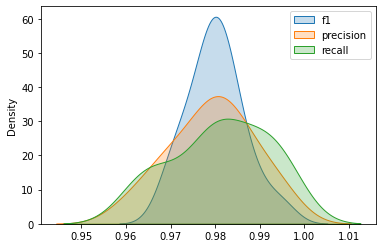

Note that your figure may not be identical, as I used a different random seed to compute this figure.

Any NaN in f1_scores: False
Any NaN in precision_scores: False
Any NaN in recall_scores: False
Any inf in f1_scores: False
Any inf in precision_scores: False
Any inf in recall_scores: False
f1 score range: 0.9531926354567862 to 0.9828023116081619
precision score range: 0.9534290116662999 to 0.9827746489145319
recall score range: 0.9542857142857143 to 0.9828571428571429


<ipython-input-22-9037545ad58c>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(f1_scores, bw_adjust=0.5, label='f1', shade=True)
<ipython-input-22-9037545ad58c>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(precision_scores, bw_adjust=0.5, label='precision', shade=True)
<ipython-input-22-9037545ad58c>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recall_scores, bw_adjust=0.5, label='recall', shade=True)


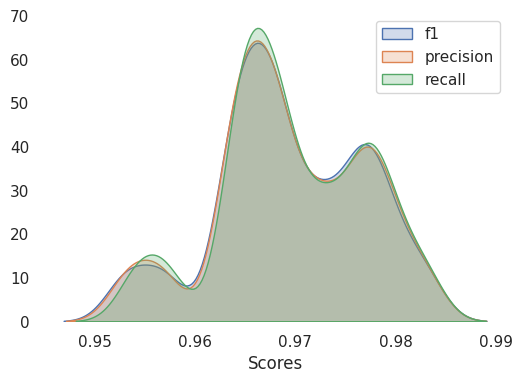

In [22]:
# 70% Training 30% Teseting
import seaborn as sns
import matplotlib.pyplot as plt

# Check for NaN or infinite values in your score arrays
print("Any NaN in f1_scores:", np.isnan(f1_scores).any())
print("Any NaN in precision_scores:", np.isnan(precision_scores).any())
print("Any NaN in recall_scores:", np.isnan(recall_scores).any())

print("Any inf in f1_scores:", np.isinf(f1_scores).any())
print("Any inf in precision_scores:", np.isinf(precision_scores).any())
print("Any inf in recall_scores:", np.isinf(recall_scores).any())

# Check the range of your data
print("f1 score range:", min(f1_scores), "to", max(f1_scores))
print("precision score range:", min(precision_scores), "to", max(precision_scores))
print("recall score range:", min(recall_scores), "to", max(recall_scores))

# Plot the KDE for each distribution
sns.set(style="white")
f, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(f1_scores, bw_adjust=0.5, label='f1', shade=True)
sns.kdeplot(precision_scores, bw_adjust=0.5, label='precision', shade=True)
sns.kdeplot(recall_scores, bw_adjust=0.5, label='recall', shade=True)

ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel="", xlabel="Scores")
sns.despine(left=True, bottom=True)

plt.show()


Any NaN in f1_scores: False
Any NaN in precision_scores: False
Any NaN in recall_scores: False
Any inf in f1_scores: False
Any inf in precision_scores: False
Any inf in recall_scores: False
f1 score range: 0.9535668808680839 to 0.9773795355094335
precision score range: 0.9533490868409926 to 0.9773383076318687
recall score range: 0.9539614561027837 to 0.9775160599571735


<ipython-input-24-9037545ad58c>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(f1_scores, bw_adjust=0.5, label='f1', shade=True)
<ipython-input-24-9037545ad58c>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(precision_scores, bw_adjust=0.5, label='precision', shade=True)
<ipython-input-24-9037545ad58c>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recall_scores, bw_adjust=0.5, label='recall', shade=True)


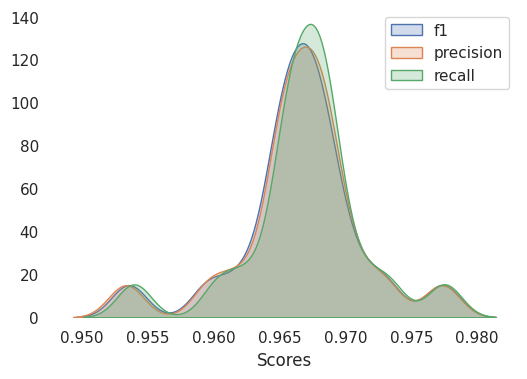

In [24]:
# 60% Training 40% Teseting

import seaborn as sns
import matplotlib.pyplot as plt

# Check for NaN or infinite values in your score arrays
print("Any NaN in f1_scores:", np.isnan(f1_scores).any())
print("Any NaN in precision_scores:", np.isnan(precision_scores).any())
print("Any NaN in recall_scores:", np.isnan(recall_scores).any())

print("Any inf in f1_scores:", np.isinf(f1_scores).any())
print("Any inf in precision_scores:", np.isinf(precision_scores).any())
print("Any inf in recall_scores:", np.isinf(recall_scores).any())

# Check the range of your data
print("f1 score range:", min(f1_scores), "to", max(f1_scores))
print("precision score range:", min(precision_scores), "to", max(precision_scores))
print("recall score range:", min(recall_scores), "to", max(recall_scores))

# Plot the KDE for each distribution
sns.set(style="white")
f, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(f1_scores, bw_adjust=0.5, label='f1', shade=True)
sns.kdeplot(precision_scores, bw_adjust=0.5, label='precision', shade=True)
sns.kdeplot(recall_scores, bw_adjust=0.5, label='recall', shade=True)

ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel="", xlabel="Scores")
sns.despine(left=True, bottom=True)

plt.show()


Any NaN in f1_scores: False
Any NaN in precision_scores: False
Any NaN in recall_scores: False
Any inf in f1_scores: False
Any inf in precision_scores: False
Any inf in recall_scores: False
f1 score range: 0.9522801525339679 to 0.9915324837199837
precision score range: 0.9520998007840112 to 0.9918505267342477
recall score range: 0.9529914529914529 to 0.9914529914529915


<ipython-input-26-e53aafb4006a>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(f1_scores, bw_adjust=0.5, label='f1', shade=True)
<ipython-input-26-e53aafb4006a>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(precision_scores, bw_adjust=0.5, label='precision', shade=True)
<ipython-input-26-e53aafb4006a>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recall_scores, bw_adjust=0.5, label='recall', shade=True)


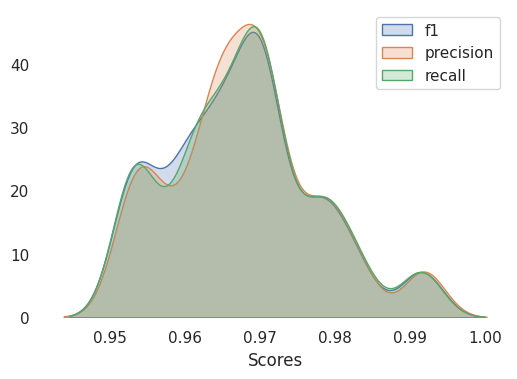

In [26]:
# 90% Training 10% Teseting

import seaborn as sns
import matplotlib.pyplot as plt

# Check for NaN or infinite values in your score arrays
print("Any NaN in f1_scores:", np.isnan(f1_scores).any())
print("Any NaN in precision_scores:", np.isnan(precision_scores).any())
print("Any NaN in recall_scores:", np.isnan(recall_scores).any())

print("Any inf in f1_scores:", np.isinf(f1_scores).any())
print("Any inf in precision_scores:", np.isinf(precision_scores).any())
print("Any inf in recall_scores:", np.isinf(recall_scores).any())

# Check the range of your data
print("f1 score range:", min(f1_scores), "to", max(f1_scores))
print("precision score range:", min(precision_scores), "to", max(precision_scores))
print("recall score range:", min(recall_scores), "to", max(recall_scores))

# Plot the KDE for each distribution
sns.set(style="white")
f, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(f1_scores, bw_adjust=0.5, label='f1', shade=True)
sns.kdeplot(precision_scores, bw_adjust=0.5, label='precision', shade=True)
sns.kdeplot(recall_scores, bw_adjust=0.5, label='recall', shade=True)

ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel="", xlabel="Scores")
sns.despine(left=True, bottom=True)

plt.show()

Any NaN in f1_scores: False
Any NaN in precision_scores: False
Any NaN in recall_scores: False
Any inf in f1_scores: False
Any inf in precision_scores: False
Any inf in recall_scores: False
f1 score range: 0.9581583571586216 to 0.9870903786765279
precision score range: 0.9589006646849599 to 0.9870906695343719
recall score range: 0.9593147751605996 to 0.987152034261242


<ipython-input-18-9e8a0ec7306e>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(f1_scores, bw_adjust=0.5, label='f1', shade=True)
<ipython-input-18-9e8a0ec7306e>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(precision_scores, bw_adjust=0.5, label='precision', shade=True)
<ipython-input-18-9e8a0ec7306e>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recall_scores, bw_adjust=0.5, label='recall', shade=True)


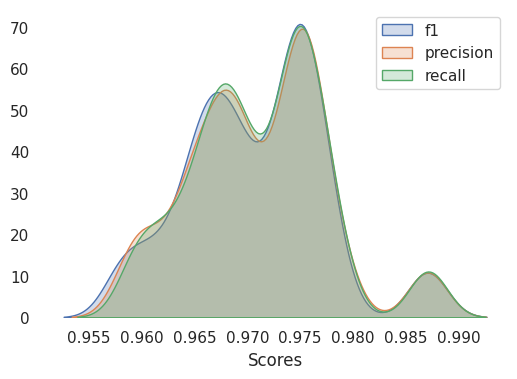

In [18]:
# 80% Training 20% Teseting

import seaborn as sns
import matplotlib.pyplot as plt

# Check for NaN or infinite values in your score arrays
print("Any NaN in f1_scores:", np.isnan(f1_scores).any())
print("Any NaN in precision_scores:", np.isnan(precision_scores).any())
print("Any NaN in recall_scores:", np.isnan(recall_scores).any())

print("Any inf in f1_scores:", np.isinf(f1_scores).any())
print("Any inf in precision_scores:", np.isinf(precision_scores).any())
print("Any inf in recall_scores:", np.isinf(recall_scores).any())

# Check the range of your data
print("f1 score range:", min(f1_scores), "to", max(f1_scores))
print("precision score range:", min(precision_scores), "to", max(precision_scores))
print("recall score range:", min(recall_scores), "to", max(recall_scores))

# Plot the KDE for each distribution
sns.set(style="white")
f, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(f1_scores, bw_adjust=0.5, label='f1', shade=True)
sns.kdeplot(precision_scores, bw_adjust=0.5, label='precision', shade=True)
sns.kdeplot(recall_scores, bw_adjust=0.5, label='recall', shade=True)

ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel="", xlabel="Scores")
sns.despine(left=True, bottom=True)

plt.show()

# Bonus exercice

This exercise is optional. If answered convincingly, I will add up to 20% to your score for this laboratory. Any point over 100% will be transferred to previous labs for which you did not get all your points.

Modify your code from the lab to use `GroupShuffleSplit` as a cross-validation approach so that repeated measurements from the same donors are appropriately attributed to either the train or the test sets, using `donor_id` as a grouping factor. As previously, use 20 splits. For each split, compute sets of FPR (false positive ratio) and TPR (true positive ratio) values. This can be done using the `sklearn.metrics.roc_curve` function. Vectors of TPR and FPR values can be concatenated into a DataFrame to be used to display the ROC curve using `sns.lineplot` so that we can see the ROC curve along with 95% confidence intervals around the mean ROC values. For the `sns.lineplot` function to work correctly, the (FPR, TPR) values must be aligned along the x-axis (i.e., the FPR values must be the same from one split to the next). To "align" the FPR values, you will need to interpolate TPR values over a regular grid of FPR values (e.g., `np.arange(0, 1.001, 0.001)`) using `scipy.interpolate.interp1d`.

For each split, compute the area under the ROC curve (AUC) using `scipy.integrate.trapz` and display the violinplot of the distribution of AUC values on a second panel. Used a 4-to-1 width ratio for the two plots.

The final figure should look like this:

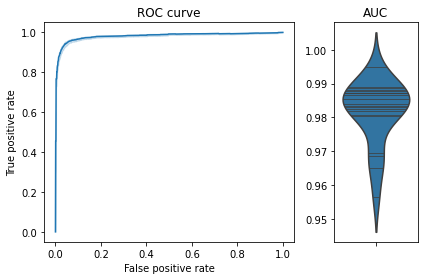

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

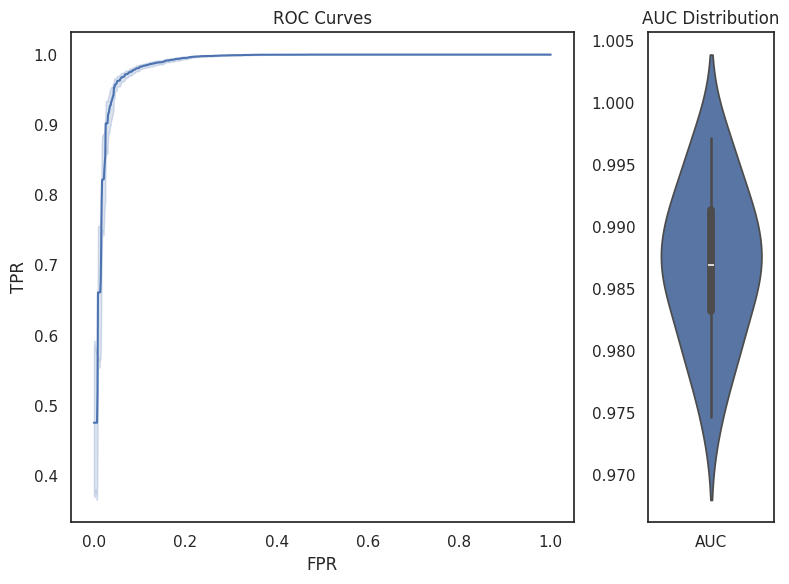

In [20]:
##### insert your code #####
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import interp1d
from scipy import integrate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


X = X_stdscaled
y = y_encoded

mlp = MLPClassifier(random_state=10)
gss = GroupShuffleSplit(n_splits=20, train_size=.7, random_state=10)
groups = cells_df['donor_id']

roc_df = pd.DataFrame(columns=['FPR', 'TPR', 'split'])

auc_scores = []

fpr_grid = np.arange(0, 1.001, 0.001)

for i, (train_idx, test_idx) in enumerate(gss.split(X_stdscaled, y_encoded, groups)):
    X_train, X_test = X_stdscaled[train_idx], X_stdscaled[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    mlp.fit(X_train, y_train)
    y_prob = mlp.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    interp_tpr = interp1d(fpr, tpr, kind='linear')
    tpr_interpolated = interp_tpr(fpr_grid)

    roc_df = pd.concat([roc_df, pd.DataFrame({'FPR': fpr_grid, 'TPR': tpr_interpolated, 'split': [i]*len(fpr_grid)})])

    auc_score = integrate.trapz(tpr_interpolated, fpr_grid)
    auc_scores.append(auc_score)

plt.figure(figsize=(8, 6))
gs = GridSpec(1, 2, width_ratios=[4, 1])

ax0 = plt.subplot(gs[0])
sns.lineplot(data=roc_df, x="FPR", y="TPR", errorbar=('ci', 95), estimator='mean', ax=ax0)
ax0.set_title('ROC Curves')

ax1 = plt.subplot(gs[1])
sns.violinplot(data=pd.DataFrame(auc_scores, columns=['AUC']), ax=ax1)
ax1.set_title('AUC Distribution')

plt.tight_layout()
plt.show()




############################